# NOT-gate

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
#data
x_train = torch.tensor([[1], [0], [1], [0]]).float()
y_train = torch.tensor([[0], [1], [0], [1]]).float()

In [4]:
#model
class SigmoidModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[10.0]], requires_grad=True)
        self.b = torch.tensor([[-5.0]], requires_grad=True)

    def logits(self, x):
        return x @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)
        # Similar to:
        # return -torch.mean(y * torch.log(self.f(x)) +
        # 

In [5]:
#optimizing
model = SigmoidModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.01)

for epoch in range(100_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[-10.5246]], requires_grad=True), b = tensor([[5.0583]], requires_grad=True), loss = tensor(0.0053, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


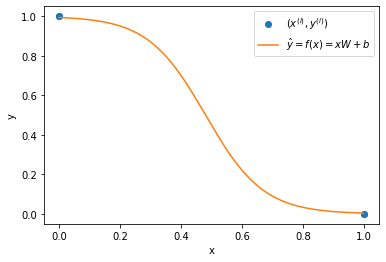

In [16]:
#visualizing
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.arange(0,1,0.001).reshape(-1,1)
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()